In [1]:
import numpy as np
from conf_exp6 import *

%pylab inline
from utils import img_utils
import seaborn
import matplotlib.pyplot as plt


def mm(A, cast_int=True):
    if cast_int:
        return (int(A.min()), int(A.max()))
    else:
        return (A.min(), A.max())

Populating the interactive namespace from numpy and matplotlib


In [2]:
parameter_name = 'scale'
formula = 'f1'
base_folder = './results/exp7/%s/%s/'%(formula, parameter_name)
scales = [4, 3, 2, 1.5, 1.2]
rango = scales

GROUPS=5
FITS=10
RANGO=len(rango)
print rango 

"""
REVISAR EL OTRO EL ORDEN DE LO
GUARDADO

"""


mse = np.zeros((RANGO, FITS, GROUPS), dtype='float32')
mse1000 = np.zeros((RANGO, FITS, GROUPS), dtype='float32')
mse2000 = np.zeros((RANGO, FITS, GROUPS), dtype='float32')
mse3000 = np.zeros((RANGO, FITS, GROUPS), dtype='float32')

A = {}

# example: mse1000_g0_f0.npy  
name_tmp1 = base_folder + 'mse_g%d_f%d.npy'
name_tmp2 = base_folder + 'mse%d_g%d_f%d.npy'
name_tmp3 = base_folder + 'A_g%d_scale%d.npy'
for group in xrange(GROUPS):
    for fit in xrange(FITS):
        mse[:, fit, group] = np.load(name_tmp1%(group, fit))
        mse1000[:, fit, group] = np.load(name_tmp2%(1000, group, fit))
        mse2000[:, fit, group] = np.load(name_tmp2%(2000, group, fit))
        mse3000[:, fit, group] = np.load(name_tmp2%(3000, group, fit))
        #A_g4_scale4.npy
        if group == 0 :
            for i in xrange(RANGO):
                A[i] = np.load(name_tmp3%(group, i)) 

print mse.shape


[4, 3, 2, 1.5, 1.2]
(5, 10, 5)


In [3]:

print rango
_mean = mse.mean(axis=2).mean(axis=1)
var = np.std(np.std(mse, axis=2), axis=1)
print mean
print var

[4, 3, 2, 1.5, 1.2]
<function mean at 0x7fe6300c6500>
[ 325235.34375  325239.25     325211.40625  325194.9375   325192.59375]


[4, 3, 2, 1.5, 1.2]


/user/lgomez/home/anaconda2/lib/python2.7/site-packages/matplotlib/axes/_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


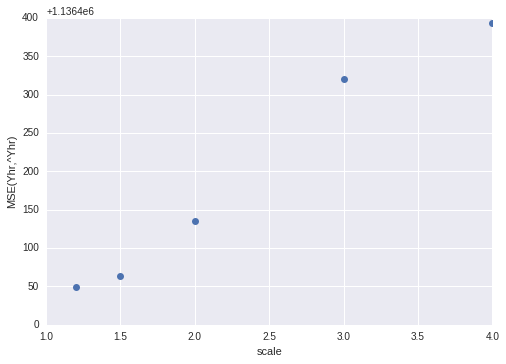

In [4]:
#rango = np.arange(1.627e-15, 2.0, 0.2)
print rango

mean3000 = mse3000.mean(axis=2).mean(axis=1)

#plt.plot(rango, mean3000,'o', label='b=3000')
#plt.plot(rango, mean1000, 'o', label='b=1000')
#plt.plot(rango, mean2000,'o', label='b=2000')
#plt.errorbar(rango, _mean, yerr=var, fmt='o')
plt.plot(rango, _mean,'o')
plt.legend()
plt.ylabel('MSE(Yhr,^Yhr)')
plt.xlabel(parameter_name)
#plt.legend(lala , loc=2, bbox_to_anchor=(1, 0.5))
#plt.xlim(0, 0.5)
#print plt.ylim((1136400.0, 1136800.0))


In [6]:
## Para grabar
plt.savefig('/user/lgomez/home/workspace/iqt/results/exp7/scales.pdf')

[4, 3, 2, 1.5, 1.2]


(0.05932899299558602, 0.8717897560329243)

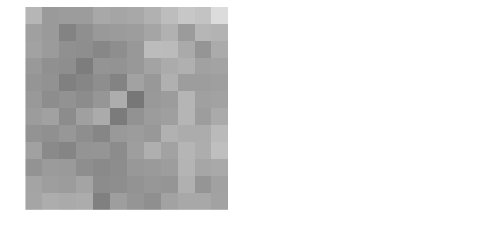

In [19]:
print rango
i_hr = np.load(base_folder + 'i_hr_g0.npy')
A0 = np.load(base_folder + 'A_g0_scale0.npy')
A1 = np.load(base_folder + 'A_g0_scale1.npy')
A2 = np.load(base_folder + 'A_g0_scale2.npy')
A3 = np.load(base_folder + 'A_g0_scale3.npy')
A4 = np.load(base_folder + 'A_g0_scale4.npy')

img_utils._isc(A4,i_hr, vmax=1)
mm(A0, cast_int=False)

(0.0, 2729.8464)

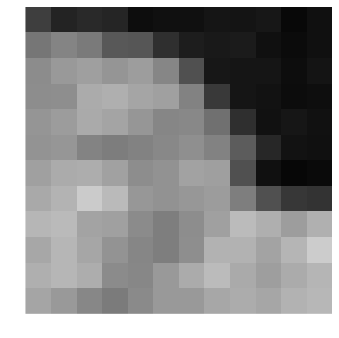

In [23]:
img_utils._is(i_hr, vmax=2729)
mm(i_hr, cast_int=False)

In [26]:
np.arange(10000, 1000001, 100000).shape


(10,)